In [1]:
import pandas as pd
import numpy as np

* 데이터 불러오기

In [2]:
train_df = pd.read_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/train_fin.csv", nrows=10_000_000)
train_df = train_df.drop(columns = ['Unnamed: 0', 'key', 'pickup_datetime'])

train_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,taxi_amount,fare_amount_ontaxi
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1,4.50
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,1,16.90
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1,5.70
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,1,7.70
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,16.00,-73.982422,40.762247,-73.997827,40.725437,2,2012,12,12,2,22,1,16.00
9999996,8.50,-73.975560,40.786877,-73.976945,40.775822,1,2013,6,26,2,12,1,8.50
9999997,24.67,-73.863336,40.771868,-73.958239,40.808153,2,2009,12,20,6,23,1,24.67
9999998,5.00,-73.963174,40.798998,-73.972607,40.785886,1,2014,1,11,5,4,1,5.00


In [3]:
dist = pd.read_csv("C:/SOOKTAT/0. 프로젝트/Taxi/data/distance.csv", nrows=10_000_000)
dist = dist.drop(columns = ['Unnamed: 0'])
dist.columns = ['distance']

dist

,distance
0,1029.600744
1,8443.441363
2,1389.132160
3,2795.789658
4,1998.337836
...,...
9999995,4289.786876
9999996,1233.208523
9999997,8966.382092
9999998,1659.521856


* train 데이터 셋과 거리 데이터 셋 합치기

In [4]:
train_df2 = pd.concat([train_df, dist], axis = 1)

train_df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,taxi_amount,fare_amount_ontaxi,distance
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1,4.50,1029.600744
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,1,16.90,8443.441363
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1,5.70,1389.132160
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,1,7.70,2795.789658
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1,5.30,1998.337836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,16.00,-73.982422,40.762247,-73.997827,40.725437,2,2012,12,12,2,22,1,16.00,4289.786876
9999996,8.50,-73.975560,40.786877,-73.976945,40.775822,1,2013,6,26,2,12,1,8.50,1233.208523
9999997,24.67,-73.863336,40.771868,-73.958239,40.808153,2,2009,12,20,6,23,1,24.67,8966.382092
9999998,5.00,-73.963174,40.798998,-73.972607,40.785886,1,2014,1,11,5,4,1,5.00,1659.521856


* fare_amount와 distance 상관관계

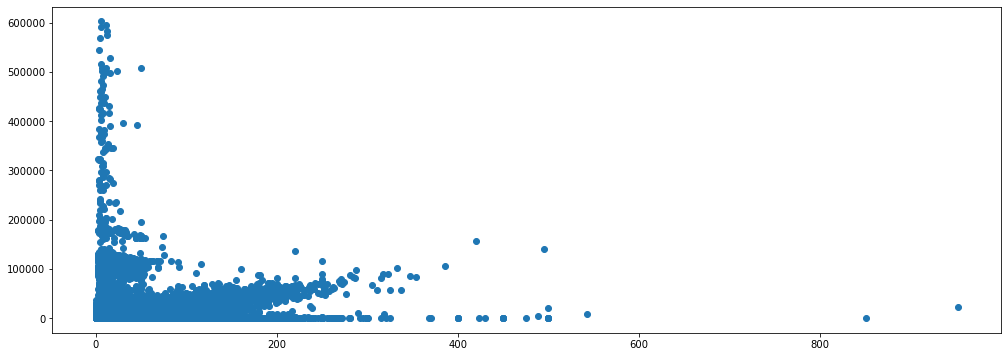

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17,6))
plt.scatter(train_df2['fare_amount'], train_df2['distance'])
plt.show()

In [10]:
np.corrcoef(train_df2['fare_amount'], train_df2['distance'])

array([[1.        , 0.72215779],
       [0.72215779, 1.        ]])

* fare_amount_ontaxi와 distance 상관관계

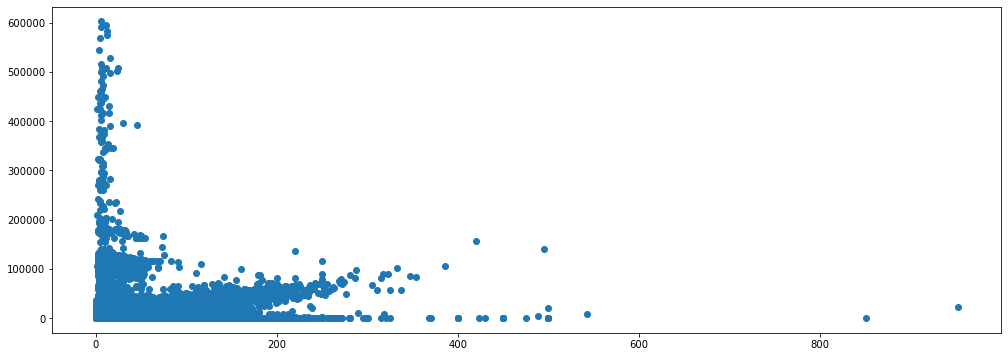

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17,6))
plt.scatter(train_df2['fare_amount_ontaxi'], train_df2['distance'])
plt.show()

* 모델 공부

In [14]:
np.corrcoef(train_df2['fare_amount_ontaxi'], train_df2['distance'])

array([[1.        , 0.70158077],
       [0.70158077, 1.        ]])

xgboost 하이퍼파라미터 https://xgboost.readthedocs.io/en/latest/parameter.html